## Naive Bayes classifier for suicide detection in texts 
## (Imbalanced Dataset)
##### In this notebook is trated the Imabalanced Dataset after preprocessing and cleaning
##### The initial dataset was equally distributed with 232,074 in two classes 
##### 0: Non-Suicide and 1: Suicide

#### Note: With this algorithm hyperparameter optimization won't be used

#### Import dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Read data

In [5]:
df = pd.read_csv('suicide_detection_final_cleaned.csv')
df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderecently leave wife go...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know irl feel...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need helpjust help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight not anymore quit


#### Checking for data balancing

In [6]:
# ver articulo sobre este tema en:
# https://machinelearningmastery.com/what-is-imbalanced-classification/
df['class'].value_counts()

class
non-suicide    107066
suicide         67902
Name: count, dtype: int64

#### Converting the fields suicide and non-suicide to 0 and 1

In [7]:
df['class'] = df['class'].apply(lambda x: 1 if x =='suicide' else 0)
df['cleaned_text'] = df['cleaned_text'].astype('U')

#### Division of the data for training and testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['class'])

#### Vectorize Training Data

In [12]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

#### Checking the cross validation metrics

In [13]:
nb_clf = MultinomialNB() # model creation 
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores = cross_validate(nb_clf, X_train_count, y_train, scoring=scoring, cv=5)

In [15]:
print(f'CV Training Accuracy:  {round(scores["test_accuracy"].mean(),3)}')
print(f'CV Training Precision: {round(scores["test_precision_macro"].mean(),3)}')
print(f'CV Training Precision: {round(scores["test_recall_macro"].mean(),3)}')
print(f'CV Training Precision: {round(scores["test_f1_macro"].mean(),3)}')

CV Training Accuracy:  0.911
CV Training Precision: 0.903
CV Training Precision: 0.914
CV Training Precision: 0.907


#### Training the model

In [16]:
nb_clf.fit(X_train_count,y_train)

MultinomialNB()

### Testing the model: X_test

In [19]:
X_test_count = v.transform(X_test)
y_pred = nb_clf.predict(X_test_count)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print(f"Test Accuracy:  {round(accuracy_score(y_test,y_pred),2)}")
print(f"Test Precision: {round(precision_score(y_test,y_pred),2)}")
print(f"Test Recall:    {round(recall_score(y_test,y_pred),2)}")
print(f"Test F1:        {round(f1_score(y_test,y_pred),2)}")

Test Accuracy:  0.91
Test Precision: 0.85
Test Recall:    0.93
Test F1:        0.89


In [36]:
confusion_matrix(y_test,y_pred)

array([[24092,  2723],
       [ 1174, 15753]], dtype=int64)

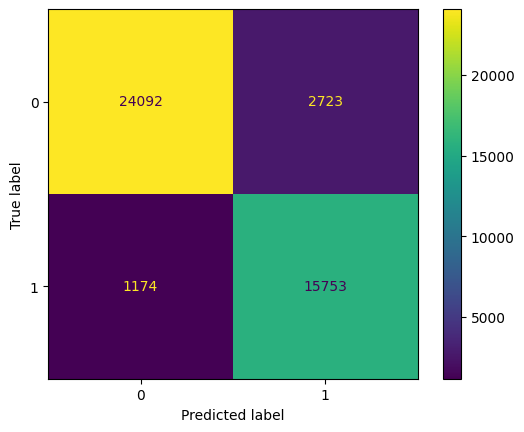

In [35]:
cm = confusion_matrix(y_test, y_pred, labels = nb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = nb_clf.classes_)
disp.plot()
plt.show()